In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#read the file
df = pd.read_csv('/content/drive/MyDrive//ML/college admission prediction.csv')

#print the head
df.head()

,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2015,95,92,2,100,IIT delhi
1,2015,75,88,3,1023,VIT vellore
2,2015,83,84,6,2935,Ahemedabad IT
3,2015,75,91,8,5647,University college of ENGG
4,2015,94,94,9,3564,SRMIST chennai


In [3]:
college=np.unique(df['College'])
print(college)
clg_code=[]
for i in range(len(college)):
    clg_code.append(i+1)

# clg_code
df['College']=df['College'].replace(college,clg_code)
bak_college=np.array(df['College'])
df.head()

['Ahemedabad IT' 'BIT Mesra' 'BITS pilani' 'BMS college of ENGG'
 'DTU delhi' 'HBUT kanpur' 'IIEST shibpur' 'IIIT hydrabad' 'IIT Bombay'
 'IIT bhilai' 'IIT delhi' 'IIT goa' 'IIT guwahati' 'IIT hydrabad'
 'IIT indore' 'IIT jammu' 'IIT jodhpur' 'IIT kanpur' 'IIT kharagpur'
 'IIT mandi' 'IIT palakkad' 'IIT ropar' 'IIT tirupati'
 'Jadavpur Univversity' 'KLEF hydrabad' 'MNIT jaipur' 'MNNIT allahabad'
 'MSIT' 'Manipal IT' 'NIT trichy' 'NIT warangal' 'NMIMS'
 'Netaji Subhas IT' 'S O A  university' 'SRMIST chennai'
 'SSN college of ENGG' 'University college of ENGG' 'VIT vellore']


,Year,10th Marks,12th Marks,12th Division,AIEEE Rank,College
0,2015,95,92,2,100,11
1,2015,75,88,3,1023,38
2,2015,83,84,6,2935,1
3,2015,75,91,8,5647,37
4,2015,94,94,9,3564,35


In [4]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

# Using only one feature
x = df.iloc[:, 4].values
y = df.iloc[:, 5].values

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

print('Shape of X_train:: ', x_train.shape)
print('Shape of y_train:: ', y_train.shape)
print('Shape of X_test:: ', x_test.shape)
print('Shape of y_test:: ', y_test.shape)

x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

print('\nShape of X_train:: ', x_train.shape)
print('Shape of y_train:: ', y_train.shape)
print('Shape of X_test:: ', x_test.shape)
print('Shape of y_test:: ', y_test.shape)

Shape of X_train::  (803,)
Shape of y_train::  (803,)
Shape of X_test::  (201,)
Shape of y_test::  (201,)

Shape of X_train::  (803, 1)
Shape of y_train::  (803,)
Shape of X_test::  (201, 1)
Shape of y_test::  (201,)


Coefficient: [0.00021998]
RMSE: 11.64


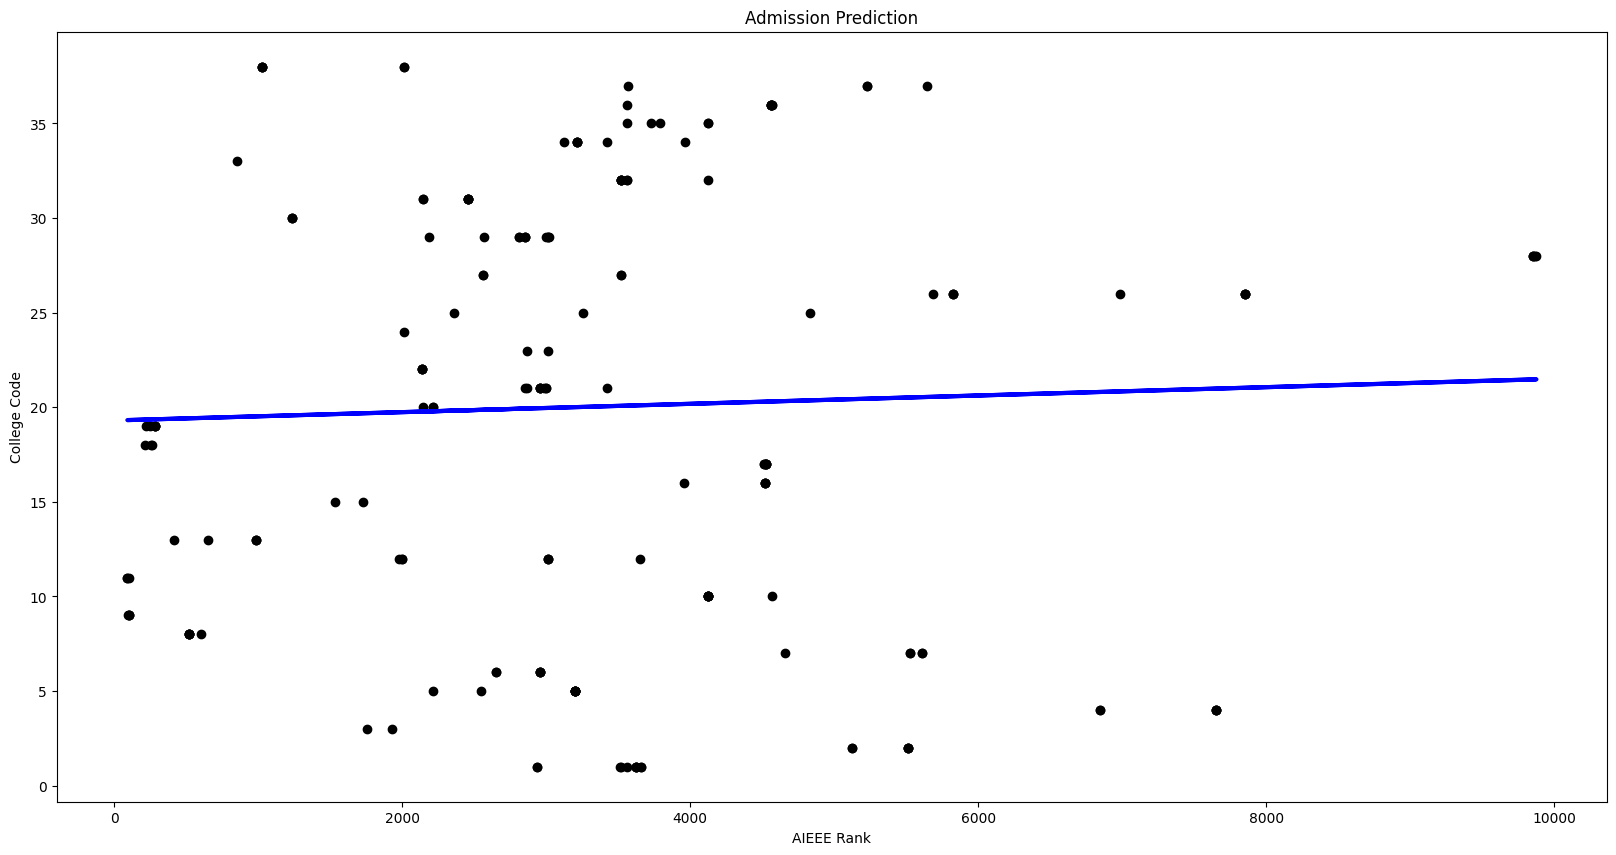

In [6]:
!pip install joblib
import joblib
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
# Save the model
joblib.dump(model, "/content/drive/MyDrive/ML/linear_model.pkl")
y_pred = model.predict(x_test)

print('Coefficient:', model.coef_)
print("RMSE: %.2f" % np.sqrt(np.mean((model.predict(x_test) - y_test) ** 2)))

plt.figure(figsize=(20,10))
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xlabel("AIEEE Rank")
plt.ylabel("College Code")
plt.title("Admission Prediction")
plt.show()


In [12]:
col=df.columns.tolist()[4:5]
print(col)
usrip=[]
for i in col:
    print("==================================================")
    usrip.append(eval(input(i+": ")))

userpreddt=model.predict([usrip])
print("You may have chance to get entrance in: ",college[clg_code.index(int(userpreddt[0]))])


['AIEEE Rank']
AIEEE Rank: 10
You may have chance to get entrance in:  IIT kharagpur


ALL STATE CUMMULATIVE JOB PREDICTION

In [15]:

#import packages
import pandas as pd
import numpy as np
import seaborn as sns

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('/content/drive/MyDrive/ML/GKD_JOBS_ALL_ENGG.csv')

#print the head
df.head()

,CollegeState,Specialization,GraduationYear,Salary
0,Delhi,instrumentation and control engineering,2013,445000
1,Delhi,computer science & engineering,2013,420000
2,Delhi,computer science & engineering,2013,200000
3,Delhi,computer science & engineering,2013,375000
4,Delhi,computer science & engineering,2013,350000


(163, 4)

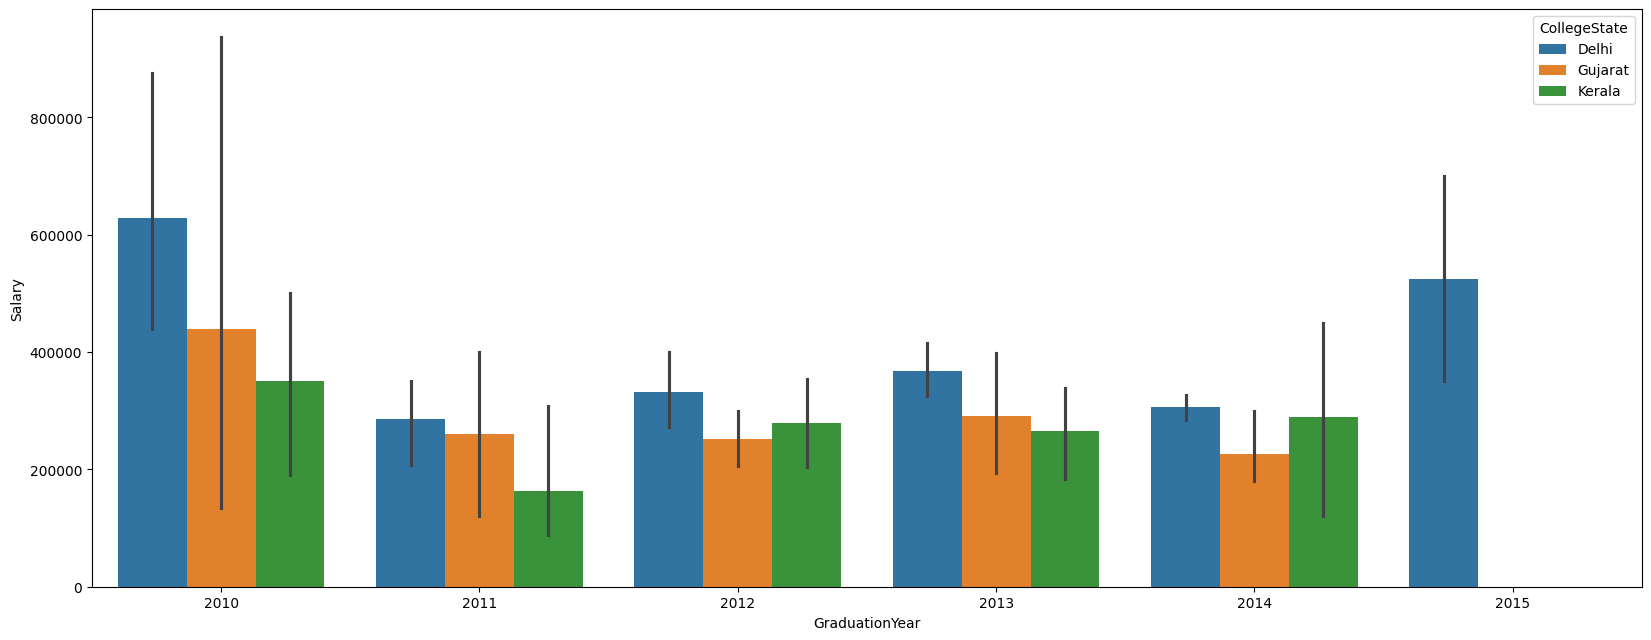

In [16]:

data=df
plt.figure(figsize=[20, 7.5]) # Set dimensions for figure
sns.barplot(x=data['GraduationYear'], y=data['Salary'], hue='CollegeState', data=data)
df.shape

In [17]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['GraduationYear', 'Salary'])
for i in range(0,len(data)):
    new_data['GraduationYear'][i] = data['GraduationYear'][i]
    new_data['Salary'][i] = data['Salary'][i]

#setting index
new_data.index = new_data.GraduationYear
new_data.drop('GraduationYear', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

# train = dataset[4:7,:]
# valid = dataset[7:8,:]

train = dataset[100:]
test = dataset[100:]
# split into input and outputs
x_train, y_train = train[:,:-1], train[:,:-1]
test_X, test_y = test[:,:-1], test[:,:-1]

# #converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(1,len(train)):
    x_train.append(scaled_data[i-1:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(62, 1, 1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU
model_gru = Sequential()
model_gru.add(LSTM(128, return_sequences=True,input_shape=(x_train.shape[1], x_train.shape[2])))
model_gru.add(LSTM(units=64, return_sequences=True))
model_gru.add(LSTM(units=16, return_sequences=True))
model_gru.add(LSTM(units=4, return_sequences=False))
model_gru.add(Dense(units=1))

model_gru.compile(loss='mse', optimizer='adam')
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             49408     
                                                                 
 lstm_2 (LSTM)               (None, 1, 16)             5184      
                                                                 
 lstm_3 (LSTM)               (None, 4)                 336       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 121493 (474.58 KB)
Trainable params: 121493 (474.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:

gru_history = model_gru.fit(x_train, y_train, epochs=100, batch_size=32)
# Save the model
model_gru.save('/content/drive/MyDrive/ML/model_gru.h5')

Epoch 1/100
2/2 [==============================] - 9s 21ms/step - loss: 0.1038
Epoch 2/100
2/2 [==============================] - 0s 21ms/step - loss: 0.1017
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0995
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0973
Epoch 5/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0951
Epoch 6/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0928
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0906
Epoch 8/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0881
Epoch 9/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0858
Epoch 10/100
2/2 [==============================] - 0s 18ms/step - loss: 0.0833
Epoch 11/100
2/2 [==============================] - 0s 18ms/step - loss: 0.0807
Epoch 12/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0781
Epoch 13/100
2/2 [==============================]

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 2s 6ms/step


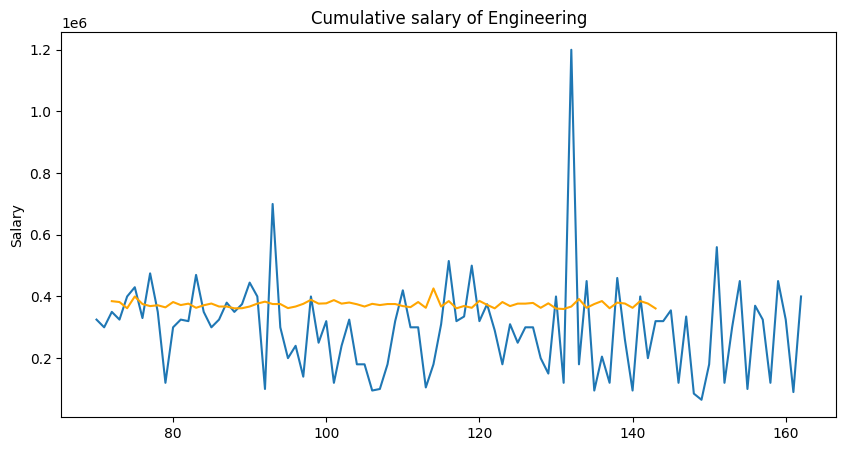

In [20]:
# Load the saved model
from tensorflow.keras.models import load_model

# Specify the path to your saved model file
saved_model_path = "/content/drive/MyDrive/ML/model_gru.h5"
loaded_model = load_model(saved_model_path)

# Predicting values using the loaded model
inputs = new_data[len(new_data) - len(test) - 10:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

test_x = []
for i in range(1, inputs.shape[0]):
    test_x.append(inputs[i-1:i, 0])
test_x = np.array(test_x)
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

# Predict using the loaded model
predicted = loaded_model.predict(test_x)
predicted = scaler.inverse_transform(predicted)

# Plotting the results
b = len(test_x)
c = len(predicted) + b
plt.figure(figsize=(10, 5))
plt.plot(df.iloc[70:, 3:4])
plt.plot(np.arange(b, c), np.array(predicted), label='Prediction', color='orange')
# plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Cumulative salary of Engineering')
plt.show()

In [21]:


# predicting values, using past 10 from the train data
inputs = new_data[len(new_data) - len(test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

test_x = []
for i in range(1,inputs.shape[0]):
    test_x.append(inputs[i-1:i,0])
test_x = np.array(test_x)
test_x.shape
test_x = np.reshape(test_x, (test_x.shape[0],test_x.shape[1], 1))
test_x.shape



(72, 1, 1)

In [22]:

predicted = model_gru.predict(test_x)
predicted = scaler.inverse_transform(predicted)

3/3 [==============================] - 4s 8ms/step


Text(0.5, 1.0, 'Cumulative salary of Engineering')

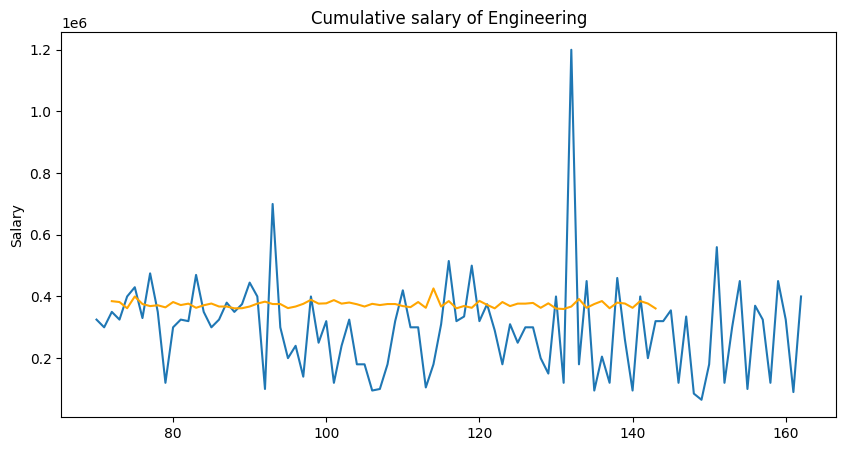

In [23]:

b=len(test_x)
c=len(predicted) + b
plt.figure(figsize=(10,5))
plt.plot(df.iloc[70:,3:4])
plt.plot(np.arange(b,c), np.array(predicted),label='Prediction', color='orange')
# plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Cumulative salary of Engineering')

Text(0.5, 1.0, 'Prediction of Cumulative salary of Engineering')

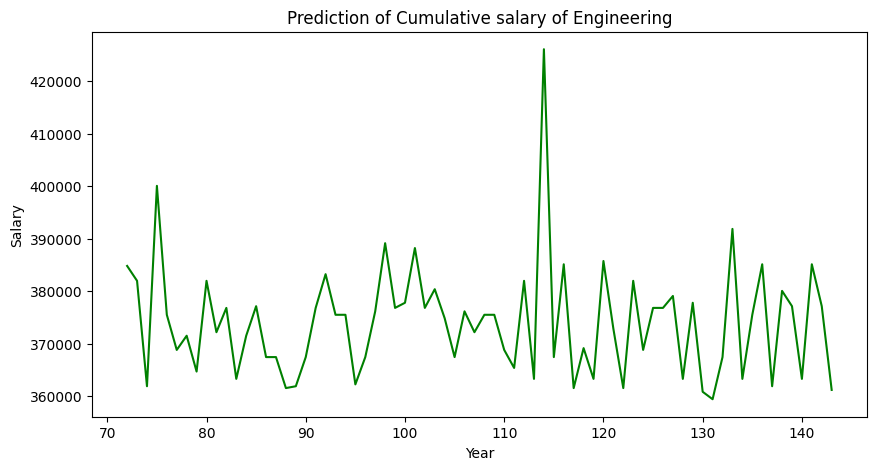

In [24]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(b,c), np.array(predicted), label='Prediction', color='green')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Prediction of Cumulative salary of Engineering')


DELHI STATE SALARY PREDICTION



In [25]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('/content/drive/MyDrive/ML/GKD_JOBS_ALL_ENGG.csv')

#print the head
df.head()

,CollegeState,Specialization,GraduationYear,Salary
0,Delhi,instrumentation and control engineering,2013,445000
1,Delhi,computer science & engineering,2013,420000
2,Delhi,computer science & engineering,2013,200000
3,Delhi,computer science & engineering,2013,375000
4,Delhi,computer science & engineering,2013,350000


<Axes: xlabel='GraduationYear', ylabel='Salary'>

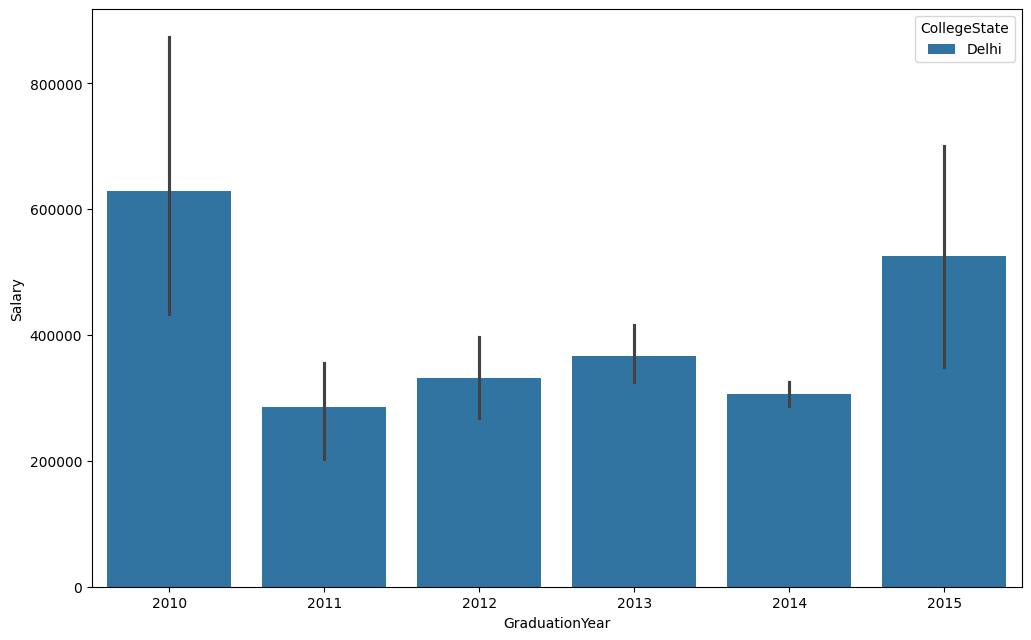

In [26]:

data=df.iloc[:122,:]
plt.figure(figsize=[12, 7.5]) # Set dimensions for figure
sns.barplot(x=data['GraduationYear'], y=data['Salary'], hue='CollegeState', data=data)

(163, 4)

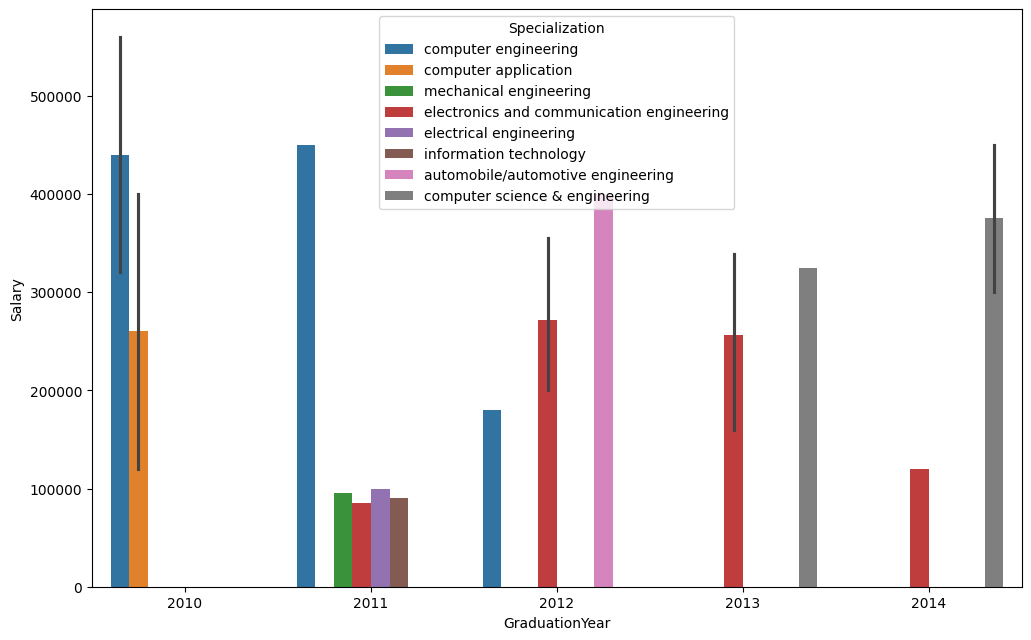

In [27]:

data=df.iloc[139:,:]
plt.figure(figsize=[12, 7.5]) # Set dimensions for figure
sns.barplot(x=data['GraduationYear'], y=data['Salary'], hue='Specialization', data=data)
df.shape

In [28]:


dff = df.iloc[:122,:]
dff.shape



(122, 4)

In [29]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#creating dataframe
data_data = dff.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(dff)),columns=['GraduationYear', 'Salary'])
for i in range(0,len(data_data)):
    new_data['GraduationYear'][i] = data_data['GraduationYear'][i]
    new_data['Salary'][i] = data_data['Salary'][i]

#setting index
new_data.index = new_data.GraduationYear
new_data.drop('GraduationYear', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

# train = dataset[4:7,:]
# valid = dataset[7:8,:]

train = dataset[:90]
test = dataset[90:]
# split into input and outputs
x_train, y_train = train[:,:-1], train[:,:-1]
test_X, test_y = test[:,:-1], test[:,:-1]

# #converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(1,len(train)):
    x_train.append(scaled_data[i-1:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

# train.shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(89, 1, 1)

In [30]:


from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU
model_gru = Sequential()
model_gru.add(GRU(128, return_sequences=True,input_shape=(x_train.shape[1], x_train.shape[2])))
model_gru.add(GRU(units=64, return_sequences=True))
model_gru.add(GRU(units=16, return_sequences=True))
model_gru.add(GRU(units=4, return_sequences=False))
model_gru.add(Dense(units=1))

model_gru.compile(loss='mse', optimizer='adam')
model_gru.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 128)            50304     
                                                                 
 gru_1 (GRU)                 (None, 1, 64)             37248     
                                                                 
 gru_2 (GRU)                 (None, 1, 16)             3936      
                                                                 
 gru_3 (GRU)                 (None, 4)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 91757 (358.43 KB)
Trainable params: 91757 (358.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:

gru_history = model_gru.fit(x_train, y_train, epochs=100, batch_size=32)
model_gru.save('/content/drive/MyDrive/ML/model_gruDdelhi.h5')

Epoch 1/100
3/3 [==============================] - 14s 11ms/step - loss: 0.0827
Epoch 2/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0717
Epoch 3/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0605
Epoch 4/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0494
Epoch 5/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0397
Epoch 6/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0305
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0249
Epoch 8/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0235
Epoch 9/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0244
Epoch 10/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0259
Epoch 11/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0253
Epoch 12/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0238
Epoch 13/100
3/3 [==============================]

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
# predicting values, using past 10 from the train data
inputs = new_data[len(new_data) - len(test) - 1:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

test_x = []
for i in range(1,inputs.shape[0]):
    test_x.append(inputs[i-1:i,0])
test_x = np.array(test_x)
test_x.shape
test_x = np.reshape(test_x, (test_x.shape[0],test_x.shape[1], 1))
test_x.shape

(32, 1, 1)

In [33]:
predicted = model_gru.predict(test_x)
predicted = scaler.inverse_transform(predicted)
print(b,c)

1/1 [==============================] - 4s 4s/step
72 144


Text(0.5, 1.0, 'Cumulative salary of Engineering (DELHI)')

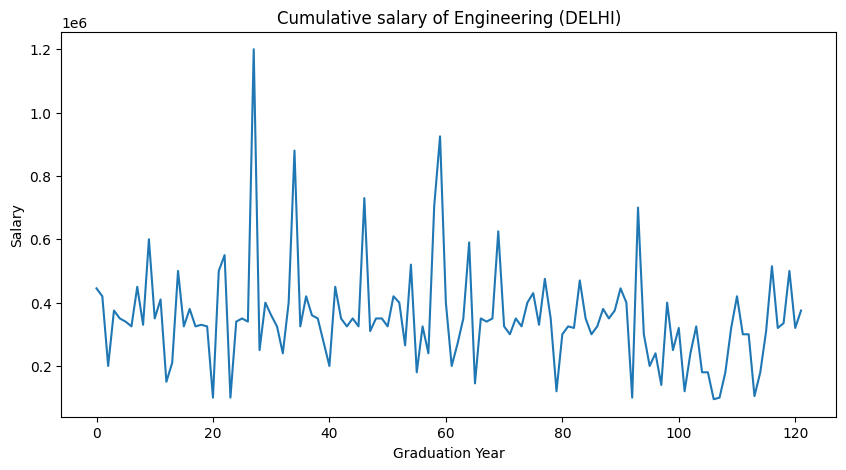

In [34]:

b=len(test_x)
c=len(predicted) + b
plt.figure(figsize=(10,5))
plt.plot(dff['Salary'])
# plt.plot(np.arange(b,c), np.array(predicted),label='Prediction', color='orange')
plt.xlabel('Graduation Year')
plt.ylabel('Salary')
plt.title('Cumulative salary of Engineering (DELHI)')

Text(0.5, 1.0, 'Prediction of Cumulative salary of Engineering (DELHI)')

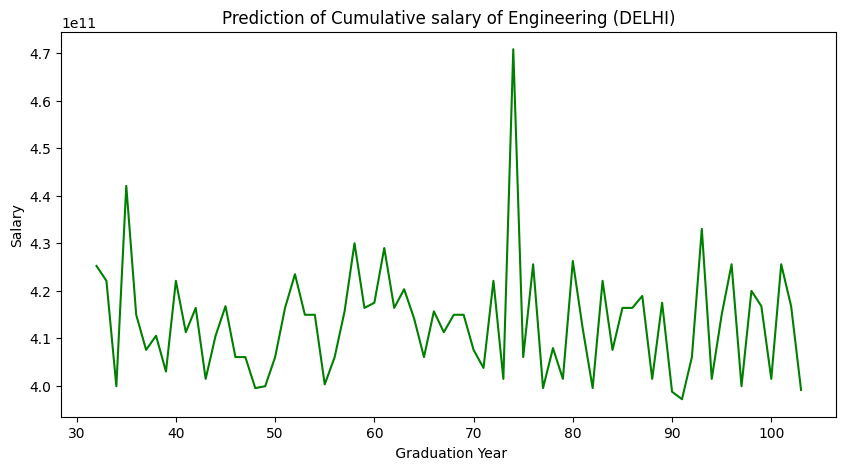

In [35]:

plt.figure(figsize=(10,5))
plt.plot(np.arange(b,c), np.array(predicted), label='Prediction', color='green')
plt.xlabel(' Graduation Year')
plt.ylabel('Salary')
plt.title('Prediction of Cumulative salary of Engineering (DELHI)')